In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
df = pd.read_csv("pizza_data.csv")

In [3]:
df

,Company,Pizza Name,Type,Size,Price
0,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Small (10"")",$5.99
1,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Medium (12"")",$7.99
2,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Large (14"")",$9.99
3,Domino's Pizza,Handmade Pan,Cheeses Pizza,"Medium (12"")",$7.99
4,Domino's Pizza,Crunchy Thin Crust,Cheeses Pizza,"Small (10"")",$5.99
...,...,...,...,...,...
366,IMO's Pizza,BBQ Chicken Pizza,Specialty Pizzas,"X Large (16"")",$23.85
367,IMO's Pizza,Egg-Ceptional Pizza,Specialty Pizzas,"Small (10"")",$11.80
368,IMO's Pizza,Egg-Ceptional Pizza,Specialty Pizzas,"Medium (12"")",$14.95
369,IMO's Pizza,Egg-Ceptional Pizza,Specialty Pizzas,"Large (14"")",$18.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Company     371 non-null    object
 1   Pizza Name  371 non-null    object
 2   Type        371 non-null    object
 3   Size        371 non-null    object
 4   Price       371 non-null    object
dtypes: object(5)
memory usage: 14.6+ KB


In [5]:
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)

In [6]:
df.isnull().sum()

Company       0
Pizza Name    0
Type          0
Size          0
Price         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Company     371 non-null    object 
 1   Pizza Name  371 non-null    object 
 2   Type        371 non-null    object 
 3   Size        371 non-null    object 
 4   Price       371 non-null    float64
dtypes: float64(1), object(4)
memory usage: 14.6+ KB


In [8]:
df.describe()

,Price
count,371.000000
mean,16.319326
std,5.714662
min,4.290000
25%,12.490000
50%,15.490000
75%,19.950000
max,29.990000


In [9]:
df.nunique()

Company         4
Pizza Name    247
Type            9
Size           11
Price          56
dtype: int64

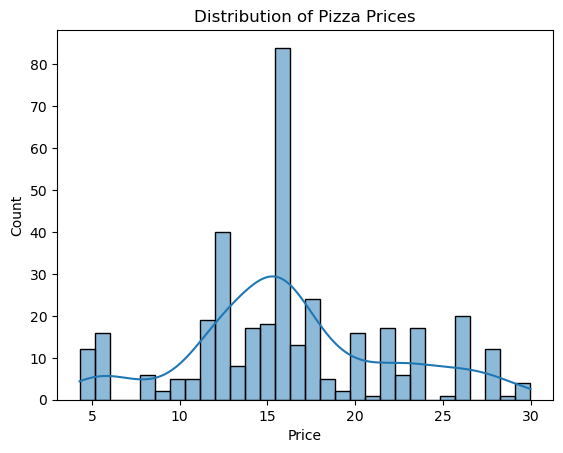

In [10]:
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Pizza Prices')
plt.show()

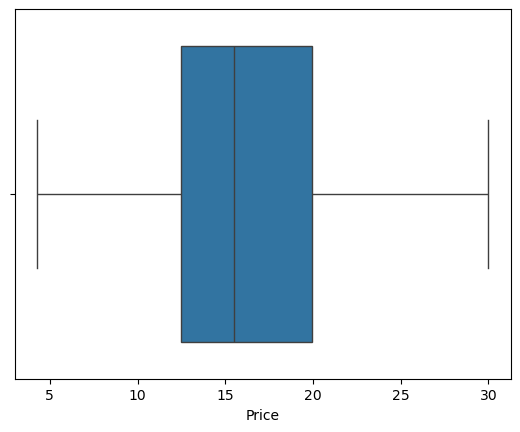

In [11]:
sns.boxplot(x=df['Price'])
plt.show()

# Distribution of Prices:
    The prices of pizzas range from 5$ to 30$ with most of the pizzas are between 12-20 dollars

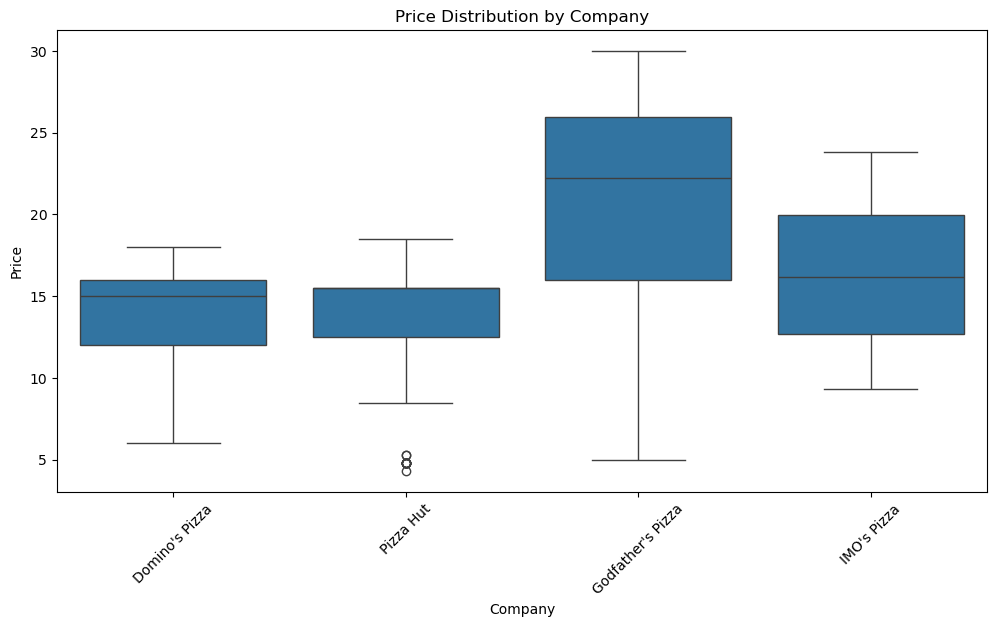

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Company', y='Price')
plt.xticks(rotation=45)
plt.title('Price Distribution by Company')
plt.show()

# Price distribution by company:

**Dominos** and **Pizza Hut** lie almost in the same region and they are cheap as compared to others.  
**IMO's** Pizza is a little bit expensive.  
**Godfather's** Pizza is the most expensive one.


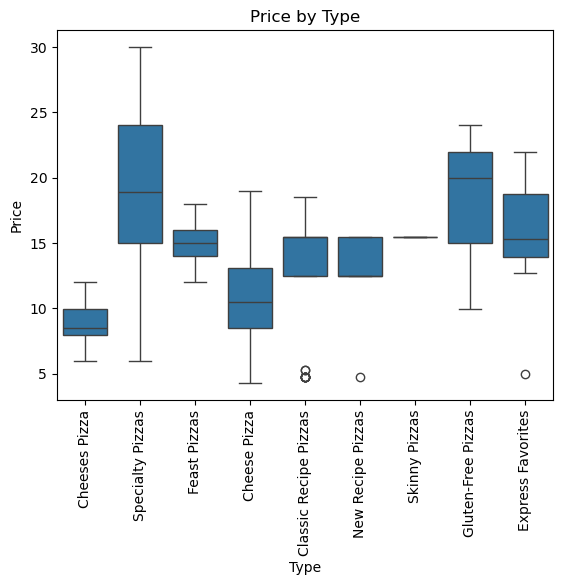

In [13]:
sns.boxplot(data=df, x='Type', y='Price')
plt.xticks(rotation=90)
plt.title('Price by Type')
plt.show()

# Type vs Price:
**Cheese** pizza are the cheapest ones with most below 10 dollars whereas **Speciality Pizzas** are the most selling amoungst all and almost the most expensive ones as well.
**Skinny Pizzas** are barely one or two sold.
Remaining all lie mostly in 10-20 dollars range.

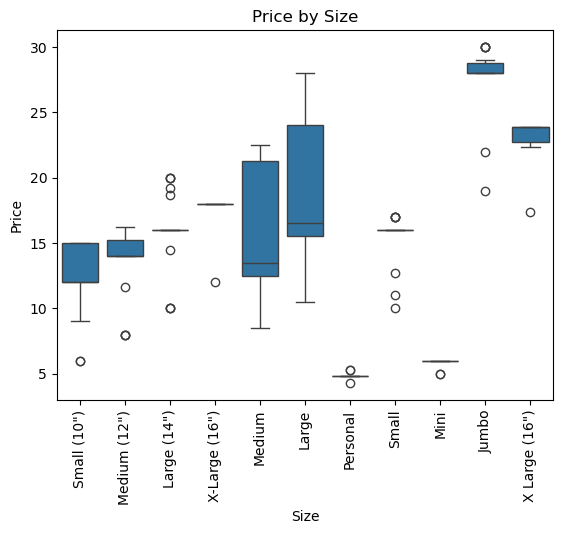

In [14]:
sns.boxplot(data=df, x='Size', y='Price')
plt.xticks(rotation=90)
plt.title('Price by Size')
plt.show()

**Jumbo Pizza** is the most expensive ones ranging between 28-29 dollars and some outliers went to 30 but they are not sold much.\
**Personal Pizza** is the cheapest one but they are sold in single figures.\
**Medium Pizza** and **Large Pizza** are the 75% of the sold ones with medium ranging from 12-22 dollars and large ranging from 15-25 dollars on an average.

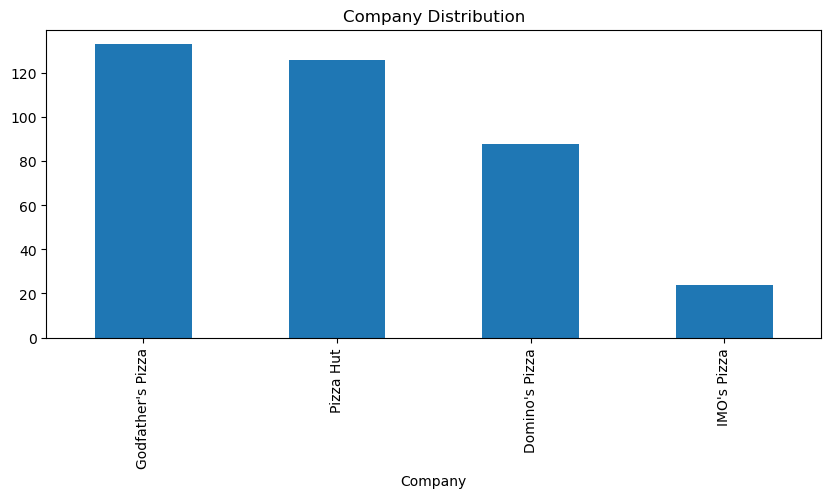

In [15]:
df['Company'].value_counts().plot(kind='bar', figsize=(10, 4), title='Company Distribution')
plt.show()

Most pizzas are from **Godfather's** with almost 140 pizzas.\
Then comes **Pizza Hut** with almost 120 pizzas.\
Then **Dominos** with nearly 85 pizzas.\
**Imo's** comes at last with a little more than 20 pizzas.

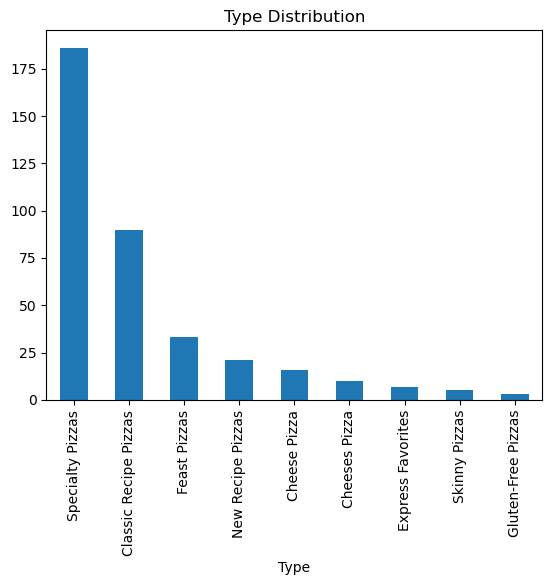

In [16]:
df['Type'].value_counts().plot(kind='bar', title='Type Distribution')
plt.show()

**Speciality Pizzas** are the most ones in the dataset with more than 180 pizzas.\
**Gluten-Free Pizzas** are the least with almost 5 pizzas

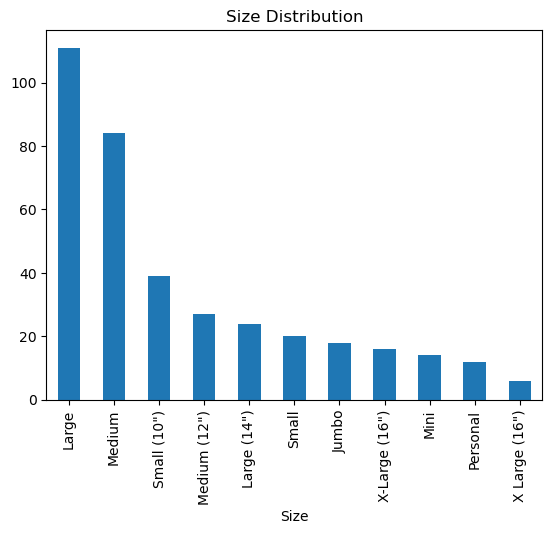

In [17]:
df['Size'].value_counts().plot(kind='bar', title='Size Distribution')
plt.show()

**Large** Pizzas are the most with almost 110 pizzas and then comes **Medium** with almost more than 80.\
**X Large** are the least ones with like 5-10 pizzas.

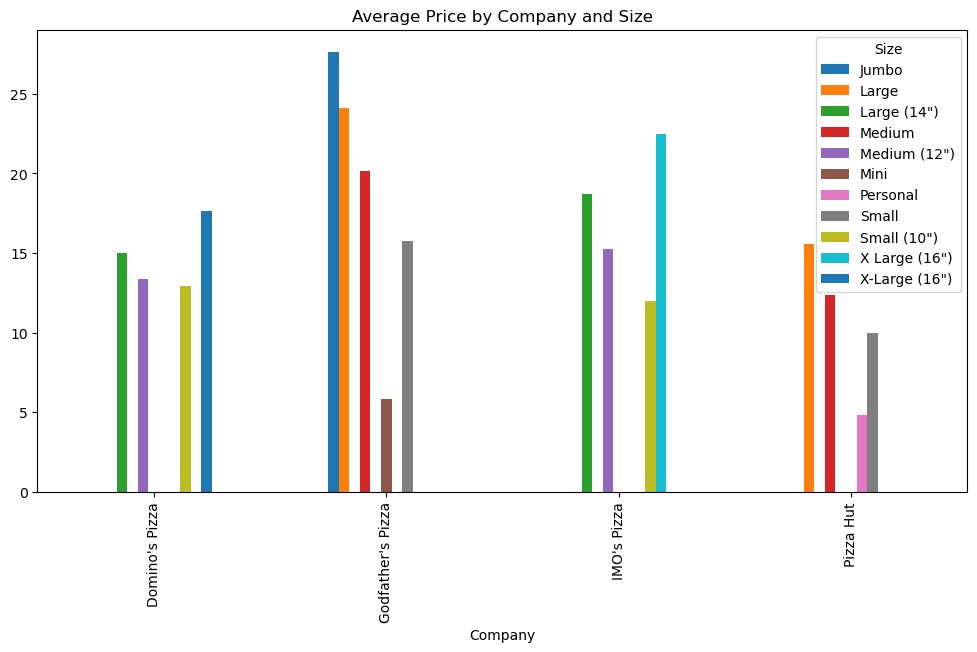

In [18]:
df.groupby(['Company', 'Size'])['Price'].mean().unstack().plot(kind='bar', figsize=(12, 6))
plt.title('Average Price by Company and Size')
plt.show()

**Dominos** have average price between 10-15.\
**GodFather's** have an average price of 16-17 dollars with very high outliers.\
**IMO's** have and average price of 14-15 dollars.\
**Pizza Hut** is almost the same as dominos.

In [19]:
# Normalize names
df['Size'] = df['Size'].replace({
    'X Large (16")': 'X-Large (16")'
})

# Apply the mapping
size_price_order = {
    'Personal': 1,
    'Mini': 2,
    'Small (10")': 3,
    'Medium (12")': 4,
    'Small': 5,
    'Medium': 6,
    'Large (14")': 7,
    'Large': 8,
    'X-Large (16")': 9,
    'Jumbo': 10
}

df['Size_Mapped'] = df['Size'].map(size_price_order)

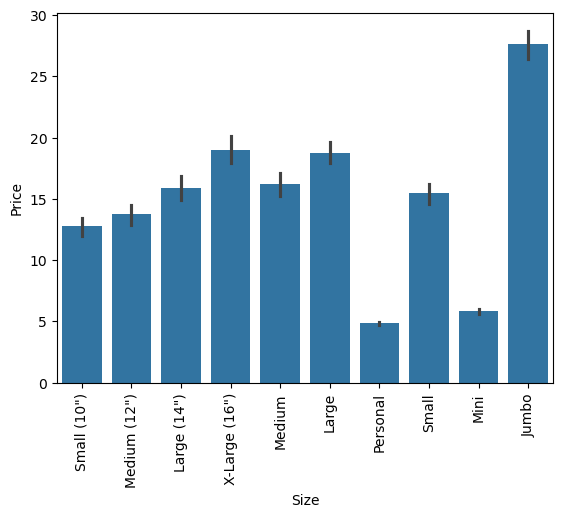

In [20]:
sns.barplot(data = df, x = "Size", y = "Price")
plt.xticks(rotation = 90)
plt.show()

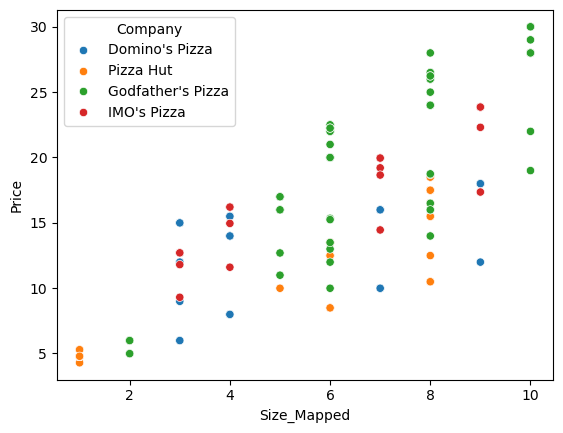

In [21]:
sns.scatterplot(data = df, x = "Size_Mapped", y = "Price", hue = "Company")
plt.show()

In [22]:
df["Size_Mapped"].nunique()

10

# One Hot Encoding (Company column)

In [23]:
df = pd.get_dummies(df, columns=['Company'], dtype=int)

In [24]:
df.head()

,Pizza Name,Type,Size,Price,Size_Mapped,Company_Domino's Pizza,Company_Godfather's Pizza,Company_IMO's Pizza,Company_Pizza Hut
0,Hand Tossed,Cheeses Pizza,"Small (10"")",5.99,3,1,0,0,0
1,Hand Tossed,Cheeses Pizza,"Medium (12"")",7.99,4,1,0,0,0
2,Hand Tossed,Cheeses Pizza,"Large (14"")",9.99,7,1,0,0,0
3,Handmade Pan,Cheeses Pizza,"Medium (12"")",7.99,4,1,0,0,0
4,Crunchy Thin Crust,Cheeses Pizza,"Small (10"")",5.99,3,1,0,0,0


In [25]:
df.columns

Index(['Pizza Name', 'Type', 'Size', 'Price', 'Size_Mapped',
       'Company_Domino's Pizza', 'Company_Godfather's Pizza',
       'Company_IMO's Pizza', 'Company_Pizza Hut'],
      dtype='object')

In [26]:
df.Type.value_counts()

Type
Specialty Pizzas         186
Classic Recipe Pizzas     90
Feast Pizzas              33
New Recipe Pizzas         21
Cheese Pizza              16
Cheeses Pizza             10
Express Favorites          7
Skinny Pizzas              5
Gluten-Free Pizzas         3
Name: count, dtype: int64

In [27]:
df['Type'] = df['Type'].replace({'Cheeses Pizza': 'Cheese Pizza'})

In [28]:
rare_types = ['Skinny Pizzas', 'Gluten-Free Pizzas', 'Express Favorites']
df['Type'] = df['Type'].replace(rare_types, 'Other')

In [29]:
df = pd.get_dummies(df, columns=['Type'], dtype=int)

In [30]:
df.head()

,Pizza Name,Size,Price,Size_Mapped,Company_Domino's Pizza,Company_Godfather's Pizza,Company_IMO's Pizza,Company_Pizza Hut,Type_Cheese Pizza,Type_Classic Recipe Pizzas,Type_Feast Pizzas,Type_New Recipe Pizzas,Type_Other,Type_Specialty Pizzas
0,Hand Tossed,"Small (10"")",5.99,3,1,0,0,0,1,0,0,0,0,0
1,Hand Tossed,"Medium (12"")",7.99,4,1,0,0,0,1,0,0,0,0,0
2,Hand Tossed,"Large (14"")",9.99,7,1,0,0,0,1,0,0,0,0,0
3,Handmade Pan,"Medium (12"")",7.99,4,1,0,0,0,1,0,0,0,0,0
4,Crunchy Thin Crust,"Small (10"")",5.99,3,1,0,0,0,1,0,0,0,0,0


In [31]:
df.drop('Pizza Name', axis=1, inplace=True)

In [32]:
df.describe()

,Price,Size_Mapped,Company_Domino's Pizza,Company_Godfather's Pizza,Company_IMO's Pizza,Company_Pizza Hut,Type_Cheese Pizza,Type_Classic Recipe Pizzas,Type_Feast Pizzas,Type_New Recipe Pizzas,Type_Other,Type_Specialty Pizzas
count,371.000000,371.000000,371.000000,371.000000,371.00000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,16.319326,6.207547,0.237197,0.358491,0.06469,0.339623,0.070081,0.242588,0.088949,0.056604,0.040431,0.501348
std,5.714662,2.290414,0.425938,0.480205,0.24631,0.474221,0.255628,0.429227,0.285054,0.231396,0.197234,0.500673
min,4.290000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.490000,5.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.490000,6.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,19.950000,8.000000,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,29.990000,10.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
df.drop('Size', axis=1, inplace=True)

KeyError: "['Size'] not found in axis"

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       371 non-null    float64
 1   Size_Mapped                 371 non-null    int64  
 2   Company_Domino's Pizza      371 non-null    int64  
 3   Company_Godfather's Pizza   371 non-null    int64  
 4   Company_IMO's Pizza         371 non-null    int64  
 5   Company_Pizza Hut           371 non-null    int64  
 6   Type_Cheese Pizza           371 non-null    int64  
 7   Type_Classic Recipe Pizzas  371 non-null    int64  
 8   Type_Feast Pizzas           371 non-null    int64  
 9   Type_New Recipe Pizzas      371 non-null    int64  
 10  Type_Other                  371 non-null    int64  
 11  Type_Specialty Pizzas       371 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 34.9 KB
